In [1]:
import tables
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table
from astropy.time import Time
import Ska.engarchive.fetch_eng as fetch
from Ska.Matplotlib import plot_cxctime
from Ska.Numpy import interpolate
%matplotlib inline

In [2]:
h5 = tables.openFile('/proj/sot/ska/data/aimpoint_mon/aimpoint_asol_values.h5')
adat = h5.root.data[:]
h5.close()

In [3]:
asol = Table(adat)
asol = asol[asol['time'] > Time('2008:001').cxcsec]
asol['dy'] *= 20
asol['dz'] *= 20
asol.colnames
asol.sort('time')

In [4]:
acht = fetch.Msid('aach1t', stat='5min', start='2008:001')

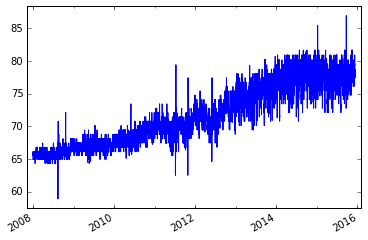

In [5]:
acht.plot()

In [6]:
len(asol)

195992

In [7]:
aok = asol[::10]

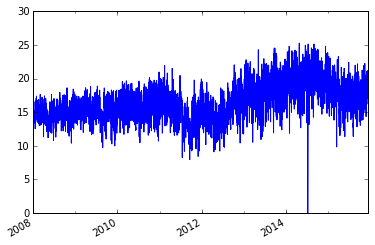

In [8]:
plot_cxctime(aok['time'], aok['dz']);

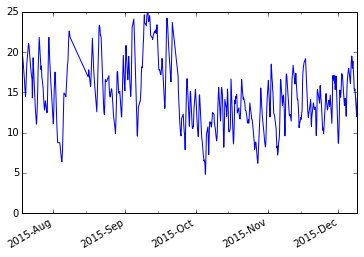

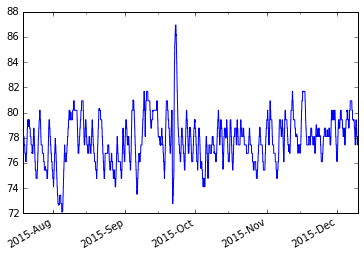

In [9]:
t0 = Time('2015:200').cxcsec
i0 = np.searchsorted(aok['time'], t0)
aok2 = aok[i0:]
plt.figure()
plot_cxctime(aok2['time'], aok2['dy']);
i1 = np.searchsorted(acht.times, t0)
plt.figure()
plot_cxctime(acht.times[i1:], acht.vals[i1:]);

In [10]:
def plot_aimpoint_aca_temp(axis, scale, start='2011:200', stop=None):
    t0 = Time('2013:001').cxcsec
    t1 = Time('2013:100').cxcsec
    ok = (asol['time'] > t0) & (asol['time'] < t1)
    offset = np.median(asol[axis][ok])

    start = Time(start)
    stop = Time.now() if (stop is None) else Time(stop)
    tstart = start.cxcsec
    tstop = stop.cxcsec

    ok = (asol['time'] > tstart) & (asol['time'] < tstop)
    aok = asol[ok]
    plt.figure(figsize=(12, 6))
    plot_cxctime(aok['time'], aok[axis], 'b-')
    print('Mean asol {} value between {} and {} is {:.2f} arcsec'
          .format(axis, start.yday, stop.yday, np.mean(aok[axis])))
    
    model = Table([acht.times, acht.vals], names=('time', 'raw_y'))
    ok = (model['time'] > t0) & (model['time'] < t1)
    y0 = np.mean(model['raw_y'][ok])
    model['y'] = scale * (model['raw_y'] - y0) + offset
    ok = (model['time'] > tstart) & (model['time'] < tstop)
    mok = model[ok]
    plot_cxctime(mok['time'], mok['y'], 'r-', alpha=0.5)
    plt.grid()
    plt.ylabel('Drift (arcsec)')
    plt.title('Aimpoint drift compared to scaled ACA housing temperature')
    
    y_interp = interpolate(mok['y'], mok['time'], aok['time'], method='linear', sorted=True)
    dy = aok[axis] - y_interp
    plot_cxctime(aok['time'], dy, 'g-')

Mean asol dy value between 2010:001:00:00:00.000 and 2010:365:00:00:00.000 is 15.34 arcsec


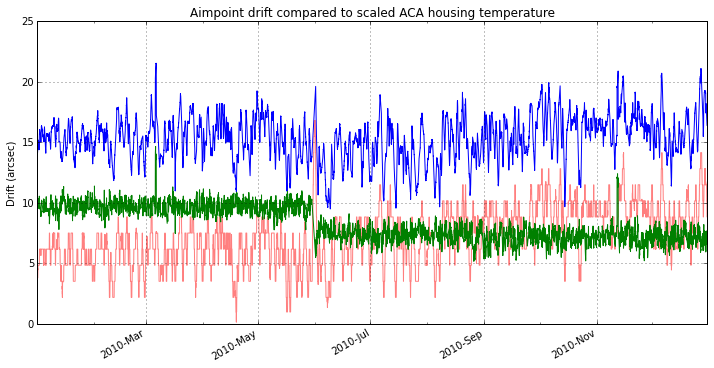

In [11]:
plot_aimpoint_aca_temp('dy', 0.1 * 20, start='2010:001', stop='2010:365')

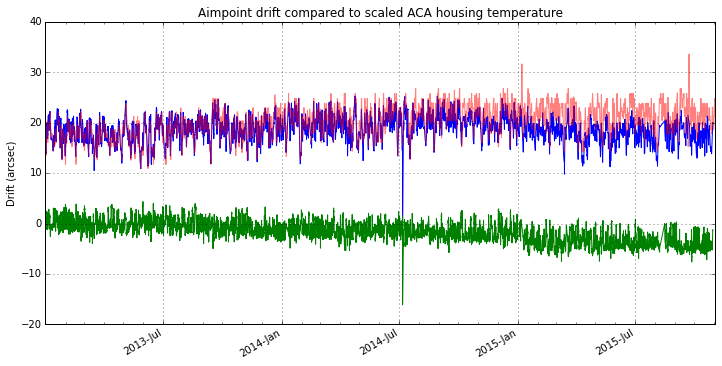

In [17]:
plot_aimpoint_aca_temp('dz', 0.065 * 20, start='2013:001')

Mean value between 2014:350:00:00:00.000 and 2015:306:15:34:29.158 is 16.99


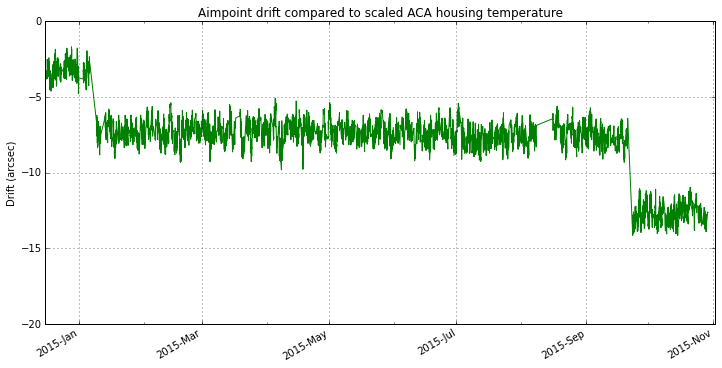

In [25]:
plot_aimpoint_aca_temp('dy', 0.1 * 20, start='2014:350')
plt.ylim(-20, 0);

Mean asol dy value between 2015:015:00:00:00.000 and 2015:260:00:00:00.000 is 17.48 arcsec
Mean asol dy value between 2015:270:00:00:00.000 and 2015:306:15:37:01.556 is 11.64 arcsec


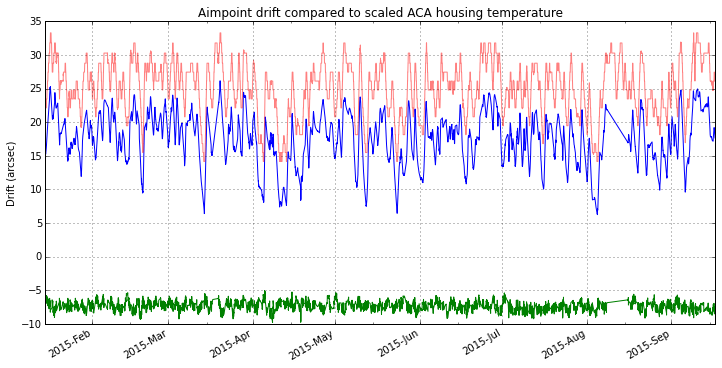

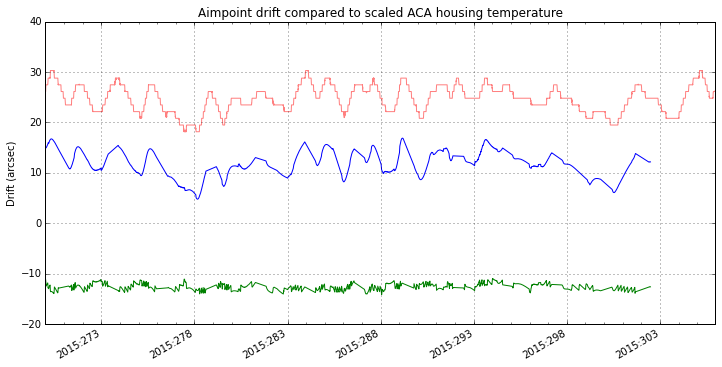

In [29]:
plot_aimpoint_aca_temp('dy', 0.1 * 20, start='2015:015', stop='2015:260')
plot_aimpoint_aca_temp('dy', 0.1 * 20, start='2015:270')

Mean asol dz value between 2015:015:00:00:00.000 and 2015:260:00:00:00.000 is 17.79 arcsec
Mean asol dz value between 2015:270:00:00:00.000 and 2015:306:15:37:47.082 is 17.02 arcsec


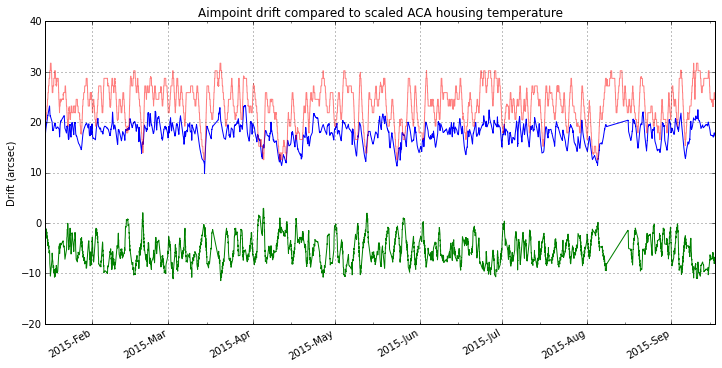

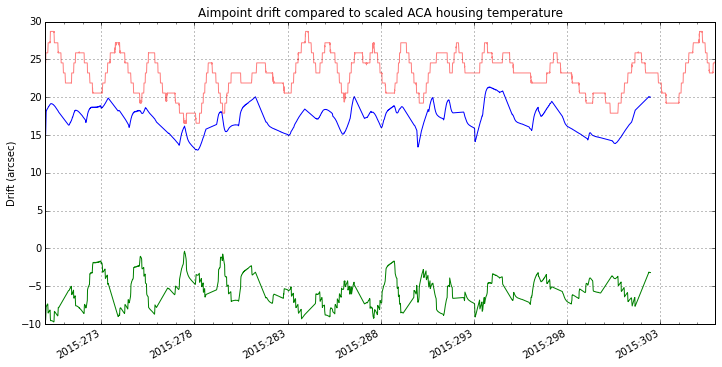

In [30]:
plot_aimpoint_aca_temp('dz', 0.1 * 20, start='2015:015', stop='2015:260')
plot_aimpoint_aca_temp('dz', 0.1 * 20, start='2015:270')

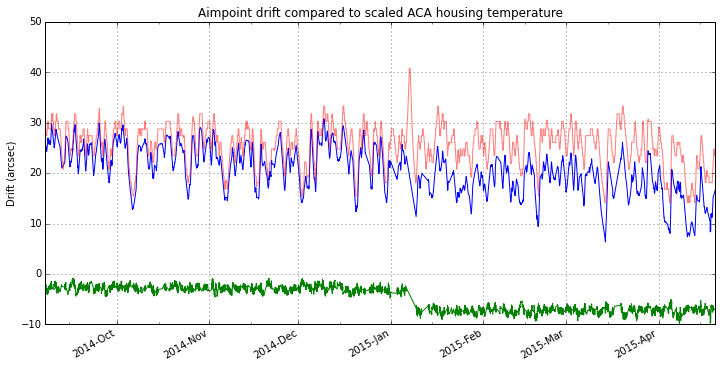

In [19]:
# 2015:006 IU reset
plot_aimpoint_aca_temp('dy', 0.1 * 20, start='2014:250', stop='2015:110')

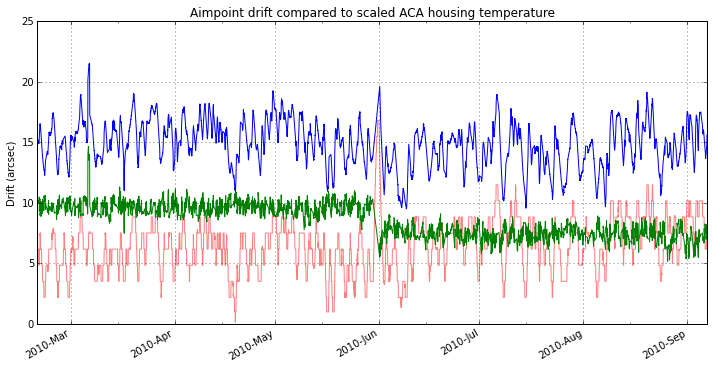

In [41]:
# 2010:149 IU reset
plot_aimpoint_aca_temp('dy', 0.1 * 20, start='2010:050', stop='2010:250')